In [136]:
# http://www.kdd.org/exploration_files/KDDCUP2005Report_Shen.pdf
# http://research.microsoft.com/pubs/81350/sigir09.pdf
# http://research.microsoft.com/pubs/79487/Query%20Enrichment%20for%20Web-query%20Classification.Shen.HKUST.TOIS.2006.Paper.pdf
%matplotlib inline

import pandas as pd
import numpy as np

import glob
import re

import matplotlib.pyplot as plt

from collections import Counter

So, `data_gatherer.ipynb` hooked up to the databases and extracted tweets reated to the #teaparty. However, there is still some minor cleanup to do before we begin answering these questions.

In [42]:
###########################################
# create a function to combine data files #
###########################################

def frame_masher():
    # find all of the query files
    numbers = [1,4,5,6,7,11,12,15] # combine these datafiles
    query_files = []
    for num in numbers:
        file ='data/tea_party/tea_party{}.csv'.format(num)
        query_files.append(file)
    
    
    # empty list to add data frames to
    frame_list = []
    
    # iterate through the files to create one combined date frame
    for frame in query_files:
        df = pd.read_csv(frame)
        frame_list.append(df)
    joined = pd.concat(frame_list).reset_index()
    final = joined.drop('index',axis = 1)
    return final

In [43]:
# create the combined data frame
df = frame_masher()

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (8,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,3,4,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6,9,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (3,4,5,6,9,11,12,14) have mixed types. Speci

In [44]:
# little bit of clean up

df = df.loc[df['job_id'] == '2572']

### 1. How many tweets are in the collection?

In [46]:
print("There are {} in this collection of Tea Party tweets".format(len(df)))

There are 2548992 in this collection of Tea Party tweets


### 2. When do they start?
**and**
### 3. When do they end?

In [82]:
# change the `changed_at` column to a datetime type

df['created_at']=pd.to_datetime(df['created_at'],format='%Y-%m-%d %H:%M:%S')

In [48]:
# find the earliest and latest tweets in the set

early = df['created_at'].min()
recent = df['created_at'].max()
print("the earliest tweet of this set is {} and the most recent is {}.".format(early,recent))

the earliest tweet of this set is 2014-08-05 13:30:16 and the most recent is 2016-04-21 21:35:44.


### 4. What is the trend for tweet volume?

In [143]:
# create a function that will output the tweet volume graph
def tweetVolume(frame):
    frame['Month'] = frame['created_at'].dt.month
    frame['Year'] = frame['created_at'].dt.year
    frame['Day'] = frame['created_at'].dt.day
    f = frame.groupby(['Day','Month','Year']).size()
    q = pd.DataFrame(f)
    
    q.reset_index(level=0, inplace=True)
    q.reset_index(level=0, inplace=True)
    q.reset_index(level=0, inplace=True)
    
    sort = q.sort(['Year','Month','Day'], ascending = [True,True,True])
    sort['date']=pd.to_datetime((sort.Year*10000+sort.Month*100+sort.Day).apply(str),format='%Y%m%d')
    
    return plt.plot(sort['date'],sort[0])

In [160]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

looks like there are some spikes in 2015.


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


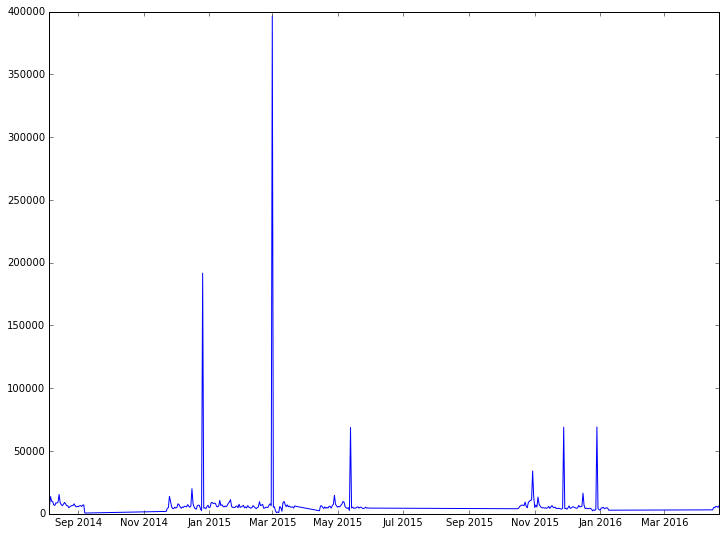

In [161]:
# convert the date column into something matplotlib can read and then plot it. 
df['date_int'] = df.created_at.astype(np.int64)
tweetVolume(df)
print("looks like there are some spikes in 2015.")

### 5. If you look at the most common words over the lifetime of the search, do you notice any particular trends associated with those words?

In [54]:
df['text'] = df['text'].astype(str).str.lower()
Counter(" ".join(df["text"]).split()).most_common(100)

[('tea', 1650654),
 ('party', 1316697),
 ('rt', 1230075),
 ('the', 1055651),
 ('to', 530801),
 ('a', 517169),
 ('#treason', 390857),
 ('@1niceguy1104:', 326794),
 ('of', 303852),
 ('is', 281538),
 ('and', 280882),
 ('in', 271112),
 ('i', 250012),
 ('for', 246492),
 ('-', 204408),
 ('you', 186983),
 ('on', 186641),
 ('meet', 184705),
 ('at', 140050),
 ('with', 133496),
 ('out', 132625),
 ('from', 126189),
 ('wanna', 118724),
 ('madhuri', 115288),
 ('new', 107435),
 ('so', 106707),
 ('boston', 102604),
 ('that', 92574),
 ('&amp;', 92048),
 ('it', 91364),
 ('this', 89627),
 ('are', 89493),
 ('have', 86712),
 ('party.', 85056),
 ('by', 78728),
 ("party's", 76764),
 ('via', 73947),
 ('be', 73300),
 ('candidate', 73130),
 ('news', 72928),
 ('chance', 72598),
 ('favorite', 72216),
 ('taj', 71939),
 ('mahal', 71654),
 ('not', 68850),
 ('my', 67508),
 ('gives', 67495),
 ('story', 67119),
 ('we', 67026),
 ('was', 66464),
 ('#meetmadhuri!', 65707),
 ('thrilled!', 65555),
 ('moon', 64519),
 ('babe

In [164]:
# extract some data frames containing popular words
boston = df[df["text"].str.contains("boston")]
obama =df[df["text"].str.contains("obama")]
gop = df[df["text"].str.contains("gop")]
candidate = df[df["text"].str.contains("candidate")]

#### Graphs of Some Popular Terms

`Boston` = Blue

`Obama` = Red

`GOP` = Green



/usr/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Boston is Blue, Obama is Red, and GOP is Green


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


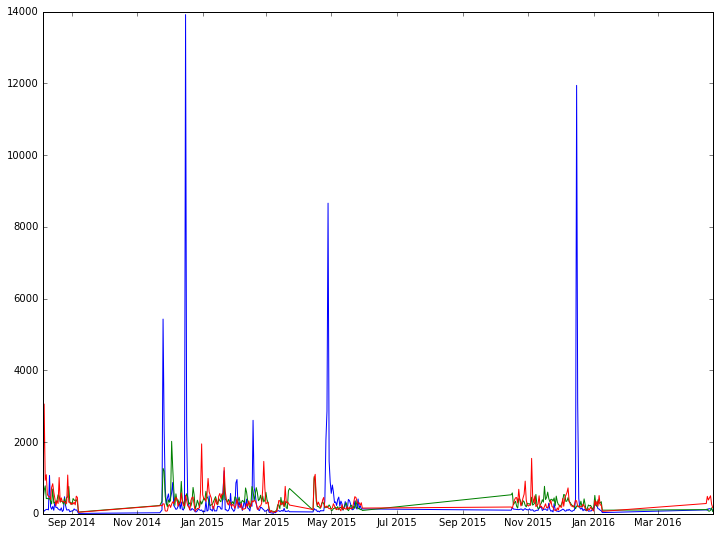

In [167]:
tweetVolume(boston)
tweetVolume(obama)
tweetVolume(gop)

### 6. What external events might correspond with the differences in the trends of most common words?

`Boston`: Well, if you will notice, Boston (the blue) has peeks around the Middle of December. This is most likely attributed to the anniversary of the Boston Tea Party, which happend on December 16th, 1773.

`Obama`: This trend has the biggest spike in December 2014. In conjunction with the Tea Party hashtag, it may have something to do with his low approval rating (or the activities that led to a low approval rating) during that period.

`GOP`: Probably the most intuitive spike is during the November 2015 - January 2016 periods in which the presidential candidates were all fighting for (or fighting against Trump, depending on how you are looking at it) the Presidential Nomination of the Grand Ole Party.

In [205]:
df['hashtags'] = df.text.str.extract('(#\w*)')

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [227]:
new = df.groupby(['Year','Month','hashtags'])['hashtags'].agg({'no':'count'})
new.reset_index(level=[0,1,2], inplace=True)

In [228]:
new

,Year,Month,hashtags,no
0,2014,8,#,438
1,2014,8,#003,2
2,2014,8,#01,2
3,2014,8,#013,1
4,2014,8,#038,1
5,2014,8,#039,3
6,2014,8,#07,1
7,2014,8,#1,206
8,2014,8,#10,4
9,2014,8,#100daysofhappychallenge,1


In [232]:
new['datetime'] = pd.to_datetime((new.Year*10000+new.Month*100+1).apply(str),format='%Y%m%d')

In [234]:
new.groupby(['datetime'], sort=True)['no'].max()

Exception: Column(s) hashtags already selected

In [235]:
idx = new.groupby(['datetime'])['no'].transform(max) == new['no']
new[idx]

,Year,Month,hashtags,no,datetime
1892,2014,8,#ferguson,5770,2014-08-01
8033,2014,9,#teaparty,848,2014-09-01
8986,2014,11,#ferguson,3121,2014-11-01
13669,2014,12,#meetmadhuri,72768,2014-12-01
21950,2015,1,#teaparty,12577,2015-01-01
28004,2015,2,#teaparty,3683,2015-02-01
32754,2015,3,#treason,390514,2015-03-01
36595,2015,4,#teaparty,2022,2015-04-01
41709,2015,5,#r5family,2617,2015-05-01
45880,2015,10,#new,4399,2015-10-01
